# K-Nearest Neighbors Classifier 알고리즘 (KNN - K-최근접 이웃 분류알고리즘)

## 1. KNN이란? 

### 1) 정의 
> KNN(K-Nearest Neighbors)은 다른 관측치(observation, X데이터)와의 유사성에 따라 분류 
- 새로운 데이터 포인트가 주어졌을 때, 그 포인트와 가장 가까운 K개의 이웃 데이터를 찾아 다수결 투표를 통해 분류하거나 평균을 내어 회귀
- `이웃` : 서로 가까이 있는 데이터
- 가까이 있는 이웃의 label 들 중 가장 많은 것을 선택하여 예측
### 2) 특징 
- 지도 학습 알고리즘  
- KNN은 간단하면서도 효과
- 특히 데이터의 분포가 복잡하거나 비선형적인 경우에 유용

### 3) KNN의  장점과 단점 
(1) 장점 
  - 이해하고 구현하기 쉬움
  - 비선형 결정 경계를 모델링할 수 있음
  - 훈련 단계가 없으므로 빠르게 적용 가능

(2) 단점
  - 큰 데이터셋에서는 계산 비용이 높음 (=느려짐)
  - 복잡한 데이터일수록 성능 저하
    - 1개에 대하여 예측을 하기 위해서 모든 데이터들과의 계산이 필요함 
  - outlier에 민감
  - 결측치에 민감 



----

## 2. KNN의 알고리즘 

### 1)  K 값을 선택
-  K개 만큼 가까운 이웃을 찾기 위해 K 값을 선택
### 2) 유클리드 거리 계산 
- 새로운 데이터 (Unknown case)와 모든 데이터 포인트 간 거리를 계산 
    - 유클리드 거리 공식 사용:
   $$ d(p, q) = \sqrt{\sum_{i=1}^{n} ( q_i-p_i)^2}$$
    - $(p)와 (q)$는 두 데이터 포인트
    -  $n$은 특성의 수
    -  $p_i$와 $q_i$는 각각의 특성 값
    -  피타고라스의 거리 계산과 같음 

### 3) 투표 및 예측
- 새로운 데이터와 훈련데이터에서 가장 가까운 `K`개의 관측치 선택
#### (1) 분류 (classification)
- 선택된 `K`개의 관측치에서 가장 많은 `label`을 새로운 데이터에 대한 `class`로 분류 

#### (2) 회귀 (regression)
- 선택된 `K`개의 관측치에서 `label`의 평균을 새로운 데이터에 대한 `value`로 예측


-----

## 3. 파이썬을 통한 구현 

### 0) 실습 설명 

- 붓꽃의 특성 데이터를 이요해 꽃의 종류를 맞추기

|구분|설명|
|---|---|
|Dataset|sklearn.datasets.load_iris()|
|Features|Sepal Length(꽃받침 길이),Sepal Width(꽃받침 너비),Petal Length(꽃잎 길이),Petal Width(꽃잎 너비)|
|Target|꽃 종류 (Setosa, Versicolor, Virginica)|
|Model|neighbors.KNeighborsClassifier()|
|평가 지표|sklearn.metrics.accuracy_score|

### 1) 필요 모듈 임포트

#### KNN을 위한 sklearn 모듈
- `neighbors.KNeighborsClassifier(n_neighbors, weights='wights')`
- n_neighbors: 정수 
   - 최근접 이웃의 수(K)
- weights: 
    - `uniform` : 모든 이웃에 동일한 가중치 부여
    - `distance` : 거리에 반비례하는 가중치 부여
    - 기본값=`uniform`

- `load_iris()` : 붓꽃 데이터 셋을 불러오는 함수

In [8]:
import numpy as np  
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

### 2) 데이터 로드 및 특성 확인

- 데이터 로드 

In [3]:
iris = load_iris()

- 데이터 확인
  - target이 sort되어 있음 (= 0, 1, 2 가 순서대로 되어있음) 
  - → 정확한 훈련을 위해 `random`하게 훈련 데이터를 처리해야함

In [5]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

- iris shape 확인 

In [6]:
iris.data.shape

(150, 4)

- feature 이름과 target 이름 출력하기
  - `feature names`: 
    - 'sepal length (cm)'
    - 'sepal width (cm)'
    - 'petal length (cm)'
    - 'petal width (cm)'
  - `target names`: 
    - 0 : 'setosa' 
    - 1 : 'versicolor' 
    - 2 : 'virginica'

In [7]:
print("feature names:", iris.feature_names)
print("target names:", iris.target_names)

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


### 3) 훈련 데이터와 테스트 데이터로 분리하기

- 두 개의 변수를 이용해 산점도 그릴 예정 
  - `iris.data[:,:2]` : 앞쪽 2개의 feature만 이용

In [9]:
X = iris.data[:, :2] 
y = iris.target
X.shape, y.shape

((150, 2), (150,))

- 데이터 분리를 위한 라이브러리 임포트
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- `X_train, X_test, y_train, y_test` : 훈련용X,테스트X, 훈련용y,테스트y
- `train_test_split` : 데이터 분리를 위한 함수 
- `(X, y, test_size=0.2, random_state=42)`
  - `X` : X 데이터
  - `y` : Target 값 
  - `test_size` : 테스트용 데이터로 얼마의 비율을 가져갈 것인가 → `0.2` : 20% 사용 
  - `random_state` : 랜덤 시드

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- shape 확인

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

### 4) KNN 모델 생성 및 학습

In [12]:
### KNN 분류기 생성
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')

### 학습 
clf.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",15
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


- 예측 실행 

In [13]:
y_pred = clf.predict(X_test)
print("Predicted labels:", y_pred)

Predicted labels: [2 0 2 1 1 0 1 2 2 1 2 0 0 0 0 2 1 1 1 2 0 1 0 2 2 2 2 2 0 0]


### 5) 예측 정확도 평가

- knn 분류 모델로 예측한 결과와 실제 레이블을 비교하여 정확도를 계산
- 모듈 : sklearn.metrics
  - 정확도 관련된 것들은 일반적으로 `metrics` 모듈에 포함되어 있음
```
from sklearn.metrics import accuracy_score
```

In [14]:
from sklearn.metrics import accuracy_score  
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


- 정확도 : 83.33%

### 6) 시각화

- X의 첫번째 특성값과 두번째 특성값을 각각 x축 y축으로 산점도 생성

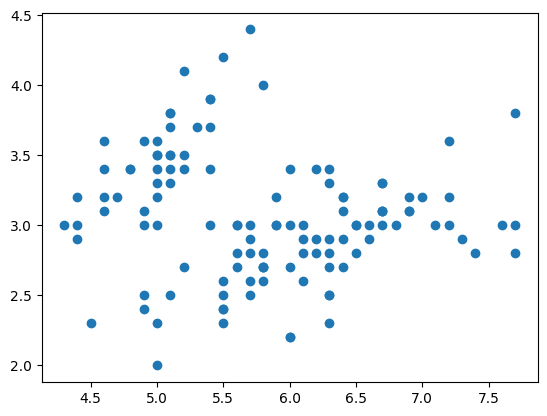

In [15]:
plt.scatter(X_train[:, 0] , X_train[:, 1])

- 색을 이용해 품종 구분 진행 
  - 먼저, X_train 중에서 y_train이 0인 것들만 출력
  - `X_train[y_train == 0]`

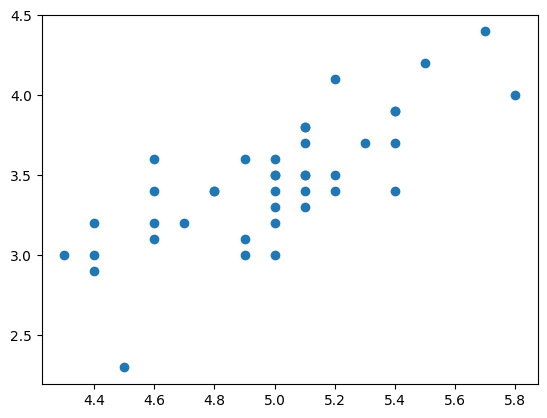

In [17]:
plt.scatter(X_train[y_train == 0][:, 0] , X_train[y_train == 0][:, 1])

- 색 별로 구분하기

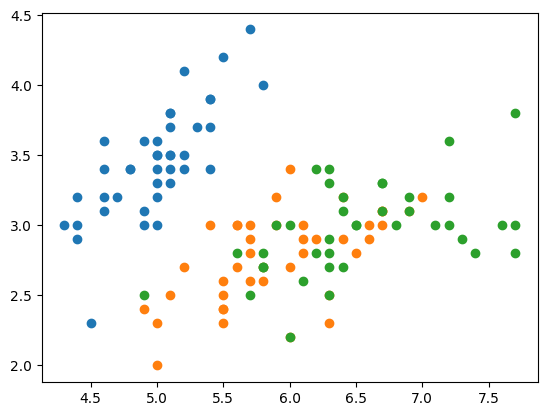

In [19]:
plt.scatter(X_train[y_train == 0][:, 0] , X_train[y_train == 0][:, 1])
plt.scatter(X_train[y_train == 1][:, 0] , X_train[y_train == 1][:, 1])
plt.scatter(X_train[y_train == 2][:, 0] , X_train[y_train == 2][:, 1])

- for 문으로 변경

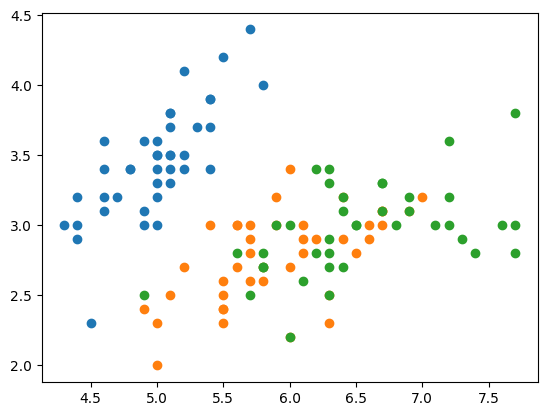

In [20]:
for i in range(3):
    plt.scatter(X_train[y_train == i][:, 0] , X_train[y_train == i][:, 1], label=f"Class {i}")  

- 새로운 데이터에대한 추측 
  - 테스트 데이터 셋에 20번재 값을 확인 
  - 빨간색 X 마커로 구분

array([0])

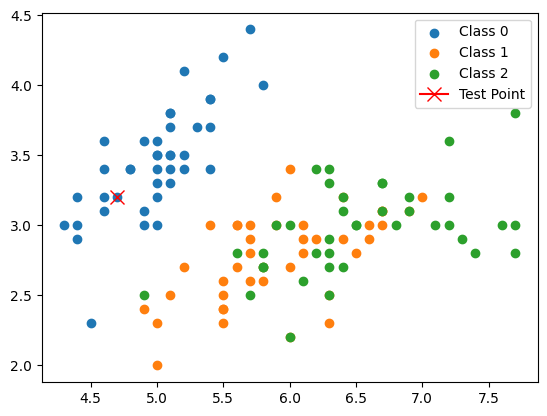

In [26]:
for i in range(3):
    plt.scatter(X_train[y_train == i][:, 0] , X_train[y_train == i][:, 1], label=f"Class {i}")  

plt.plot(X_test[20,0], X_test[20,1], c="r", marker='x', markersize=10, label='Test Point')
plt.legend()

### 예측값 : 0 으로 예측 
clf.predict(X_test[20:21])

실제 정답 확인 : 0 

In [29]:
print(y_test[20])

0


-----

### 7) 정/오답 확인

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  2  9]]


- 시각화하여 보기 편하게 만들기 → seaborn 
  - matplotlib 으로 만들어졌기 때문에 완벽 호환

In [32]:
import seaborn as sns

- Confusion Matrix 시각화
  - 0 은 완벽하게 분류 
    - → `Sepal Length` 와 `Sepal Width`로 만으로 분류 가능 
  - 단, 1과 2는 서로 유사하기 때문에 다른 특성들도 필요함

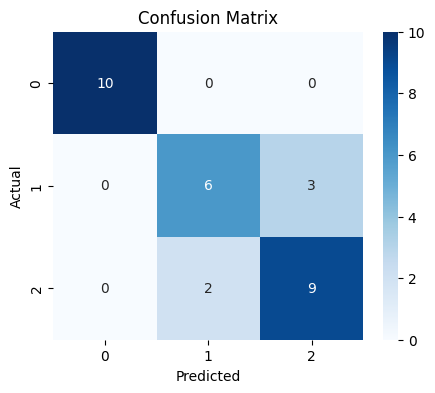

In [33]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()